K Mean Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv('Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = dataset.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

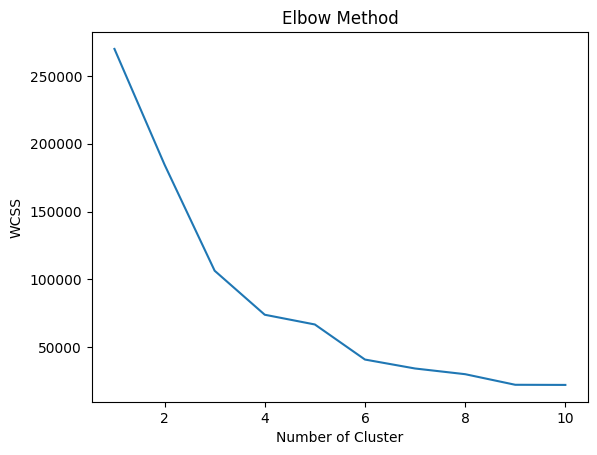

In [4]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [5]:
#Calculate the cluster with 3 and 5. Which have max silvatte score
kmeans = KMeans(n_clusters=7,init='k-means++')
y_predict =kmeans.fit_predict(X)
y_predict

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 1, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [6]:
kmeans.cluster_centers_

array([[ 25.72727273,  79.36363636],
       [ 54.88607595,  49.89873418],
       [109.7       ,  22.        ],
       [108.18181818,  82.72727273],
       [ 26.30434783,  20.91304348],
       [ 78.03571429,  81.89285714],
       [ 79.        ,  16.59259259]])

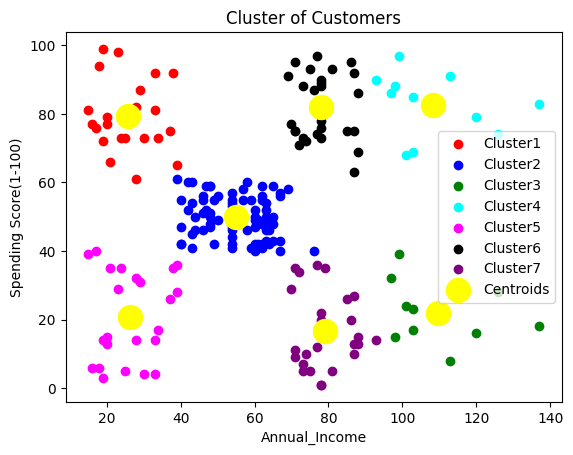

In [7]:
# Visualize the cluster
plt.scatter(X[y_predict==0,0], X[y_predict==0,1], c='red', label='Cluster1')
plt.scatter(X[y_predict==1,0], X[y_predict==1,1], c='blue', label='Cluster2')
plt.scatter(X[y_predict==2,0], X[y_predict==2,1], c='green', label='Cluster3')
plt.scatter(X[y_predict==3,0], X[y_predict==3,1], c='cyan', label='Cluster4')
plt.scatter(X[y_predict==4,0], X[y_predict==4,1], c='magenta', label='Cluster5')
plt.scatter(X[y_predict==5,0], X[y_predict==5,1], c='black', label='Cluster6')
plt.scatter(X[y_predict==6,0], X[y_predict==6,1], c='purple', label='Cluster7')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300,c='yellow', label='Centroids')
plt.title('Cluster of Customers')
plt.xlabel('Annual_Income')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil_avg = silhouette_score(X,y_predict)
sil_avg

0.5270287298101395

In [9]:
from sklearn.metrics import silhouette_samples,silhouette_score
lst_sl_avg=[]
for i in range(2,10):
    cluster_model=KMeans(n_clusters=i,init='k-means++')
    cluster_labels=cluster_model.fit_predict(X)
    sil_avg=silhouette_score(X,cluster_labels)
    lst_sl_avg.append(sil_avg)
lst_sl_avg

[0.39564531743995546,
 0.46761358158775435,
 0.4931963109249047,
 0.46097643593019916,
 0.5375812731362782,
 0.4543802872279872,
 0.459295844567539,
 0.4157369007206681]